# Anisotropic Network Model (ANM) 
ANM calculations are carried out in the same way as GNM calculations except that the ANM uses the Hessian matrix rather than the Kirchhoff matrix. There are also additional analysis options arising from the modes being 3D, such as visualization thereof in VMD using the normal mode wizard (NMWiz) and the comparison of ANM modes with the transition vectors between experimental structures.

In [1]:
from prody import *
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
confProDy(auto_show=False)
confProDy(auto_secondary=True)

@> ProDy is configured: auto_show=False
@> ProDy is configured: auto_secondary=True


First we parse a structure from the PDB. We will use the active structure of methyltransferase and also parse the inactive structure for comparison afterwards.

In [3]:
activeDimer = parsePDB('3b3f_AB_Nter_trimmed_noSAH.pdb', compressed=False)
activeDimer_ca = activeDimer.select('calpha')
inactiveDimer = parsePDB('3b3j_clean_dimer_Nter_trimmed.pdb', compressed=False)
inactiveDimer_ca = inactiveDimer.select('calpha')

@> 5222 atoms and 1 coordinate set(s) were parsed in 0.53s.
@> 5222 atoms and 1 coordinate set(s) were parsed in 0.75s.


In [4]:
activeMonomer = parsePDB('3b3f_A_Nter_trimmed_noSAH.pdb', compressed=False)
activeMonomer_ca = activeMonomer.select('calpha')
inactiveMonomer = parsePDB('3b3j_clean_Nter_trimmed.pdb', compressed=False)
inactiveMonomer_ca = inactiveMonomer.select('calpha')

@> 2611 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 2611 atoms and 1 coordinate set(s) were parsed in 0.11s.


Next, we instantiate an object of ANM class for both the active and inactive structure. We then build the Hessian matrix and calculate normal modes.

In [5]:
# Perform ANM analysis on both states (Dimer)
anm_activeDimer_ca = ANM('Active_Dimer_3b3f')
anm_activeDimer_ca.buildHessian(activeDimer_ca)
anm_activeDimer_ca.calcModes()

anm_inactiveDimer_ca = ANM('Inactive_Dimer_3b3j')
anm_inactiveDimer_ca.buildHessian(inactiveDimer_ca)
anm_inactiveDimer_ca.calcModes()

@> Hessian was built in 1.59s.
@> 20 modes were calculated in 61.87s.
@> Hessian was built in 2.03s.
@> 20 modes were calculated in 101.65s.


In [6]:
# Perform ANM analysis on both states (Monomer)
anm_activeMonomer_ca = ANM('Active_Monomer_3b3f')
anm_activeMonomer_ca.buildHessian(activeMonomer_ca)
anm_activeMonomer_ca.calcModes()

anm_inactiveMonomer_ca = ANM('Inactive_Monomer_3b3j')
anm_inactiveMonomer_ca.buildHessian(inactiveMonomer_ca)
anm_inactiveMonomer_ca.calcModes()

@> Hessian was built in 1.37s.
@> 20 modes were calculated in 66.94s.
@> Hessian was built in 1.44s.
@> 20 modes were calculated in 63.54s.


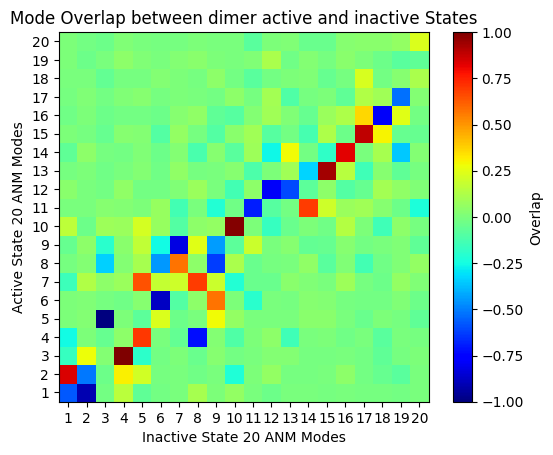

In [29]:
# Dimer overlap
from matplotlib.colors import Normalize  # Import Normalize from colors
from matplotlib.cm import ScalarMappable
# Calculate overlaps between modes
overlap = calcOverlap(anm_activeDimer_ca,anm_inactiveDimer_ca)
# Plot overlap map
fig, ax = plt.subplots()  # Create a figure and main axes
ax.imshow(overlap, cmap='jet', interpolation='none')  # Plot on the main axes

# Create and add the colorbar to the figure
sm = ScalarMappable(cmap='jet', norm=Normalize(0, 1))
colorbar = fig.colorbar(sm, label='Overlap', ax=ax)
sm.norm.vmin = -1
sm.norm.vmax = 1
plt.title('Mode Overlap between dimer active and inactive States')
plt.xlabel('Inactive State 20 ANM Modes')
plt.ylabel('Active State 20 ANM Modes')
# Set x and y ticks to be at integer positions
num_modes = overlap.shape[0]
plt.xticks(ticks=np.arange(num_modes), labels=np.arange(1, num_modes + 1))
plt.yticks(ticks=np.arange(num_modes), labels=np.arange(1, num_modes + 1))
# Invert the y-axis
plt.gca().invert_yaxis()
plt.show()

In [26]:
print(anm_activeDimer_ca)

ANM Active_Dimer_3b3f


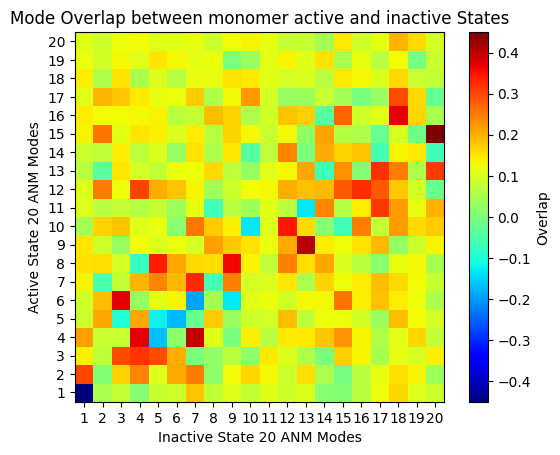

In [30]:
# Monomer Overlap
from matplotlib.colors import Normalize  # Import Normalize from colors
from matplotlib.cm import ScalarMappable
# Calculate overlaps between modes
overlap = calcOverlap(anm_activeMonomer_ca,anm_inactiveMonomer_ca)
# Plot overlap map
fig, ax = plt.subplots()  # Create a figure and main axes
ax.imshow(overlap, cmap='jet', interpolation='none')  # Plot on the main axes

# Create and add the colorbar to the figure
sm = ScalarMappable(cmap='jet', norm=Normalize(0, 1))
colorbar = fig.colorbar(sm, label='Overlap', ax=ax)
sm.norm.vmin = -0.45
sm.norm.vmax = 0.45
plt.title('Mode Overlap between monomer active and inactive States')
plt.xlabel('Inactive State 20 ANM Modes')
plt.ylabel('Active State 20 ANM Modes')
# Set x and y ticks to be at integer positions
num_modes = overlap.shape[0]
plt.xticks(ticks=np.arange(num_modes), labels=np.arange(1, num_modes + 1))
plt.yticks(ticks=np.arange(num_modes), labels=np.arange(1, num_modes + 1))
# Invert the y-axis
plt.gca().invert_yaxis()
plt.show()

# ANM modes, mean square fluctuations and cross-correlations
We can show mode shapes, square fluctuations, and cross-correlations as we did with GNM. Let's start with the first nonzero mode:

In [8]:
resnum_active_dimer = activeDimer_ca.getResnums()
resnum_inactive_dimer = inactiveDimer_ca.getResnums()

In [9]:
resnum_active = activeMonomer_ca.getResnums()
resnum_inactive = inactiveMonomer_ca.getResnums()

In [10]:
# Calculate correlation matrices
corr_activeDimer = calcCrossCorr(anm_activeDimer_ca[:20])
corr_inactiveDimer = calcCrossCorr(anm_inactiveDimer_ca[:20])

In [11]:
# Calculate correlation matrices
corr_activeMonomer = calcCrossCorr(anm_activeMonomer_ca[:20])
corr_inactiveMonomer = calcCrossCorr(anm_inactiveMonomer_ca[:20])

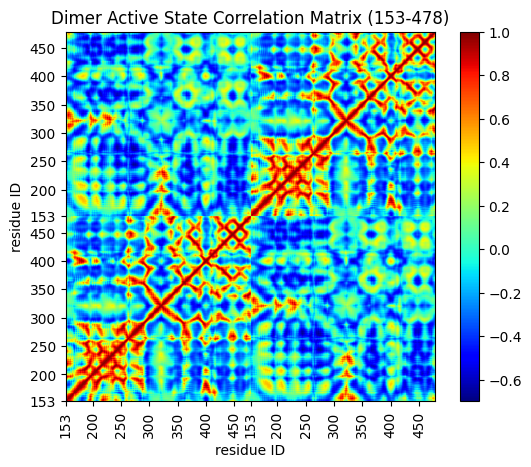

In [12]:
# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_active_dimer == 153)[0][0], np.where(resnum_active_dimer == 478)[0][0] + 1))
chain1_labels = resnum_active_dimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_active_dimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_active_dimer)))
chain2_labels = resnum_active_dimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))
# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.yticks(ticks=tick_indices, labels=labels)
plt.xlabel('residue ID')
plt.ylabel('residue ID')

# Plot for active state
plt.imshow(corr_activeDimer, cmap='jet')
plt.title('Dimer Active State Correlation Matrix (153-478)')
plt.colorbar()

# Invert y-axis for the active state plot
plt.gca().invert_yaxis()
# Display the plots
plt.show()

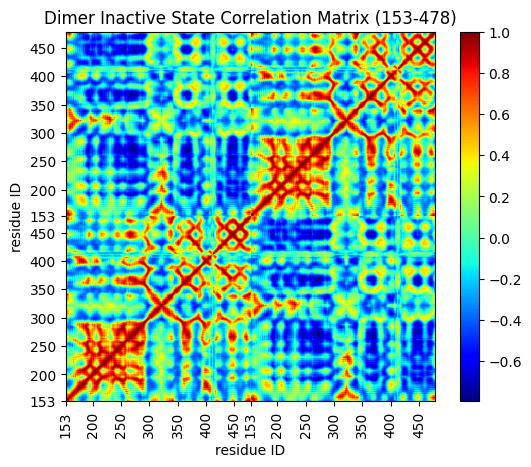

In [13]:
# Define tick indices and labels
tick_indices = []
labels = []

# Chain 1 (153 to 478)
chain1_indices = list(range(np.where(resnum_inactive_dimer == 153)[0][0], np.where(resnum_inactive_dimer == 478)[0][0] + 1))
chain1_labels = resnum_inactive_dimer[chain1_indices]
tick_indices.extend([chain1_indices[0], chain1_indices[47]] + chain1_indices[97::50])
labels.extend([chain1_labels[0], chain1_labels[47]] + list(chain1_labels[97::50]))

# Chain 2 (153 to 478)
chain2_start_index = np.where(resnum_inactive_dimer == 153)[0][1]
chain2_indices = list(range(chain2_start_index, len(resnum_inactive_dimer)))
chain2_labels = resnum_inactive_dimer[chain2_indices]
tick_indices.extend([chain2_indices[0], chain2_indices[47]] + chain2_indices[97::50])
labels.extend([chain2_labels[0], chain2_labels[47]] + list(chain2_labels[97::50]))
# Set the x-axis ticks and labels
plt.xticks(ticks=tick_indices, labels=labels, rotation=90)
plt.yticks(ticks=tick_indices, labels=labels)
plt.xlabel('residue ID')
plt.ylabel('residue ID')

# Plot for active state
plt.imshow(corr_inactiveDimer, cmap='jet')
plt.title('Dimer Inactive State Correlation Matrix (153-478)')
plt.colorbar()

# Invert y-axis for the active state plot
plt.gca().invert_yaxis()
# Display the plots
plt.show()

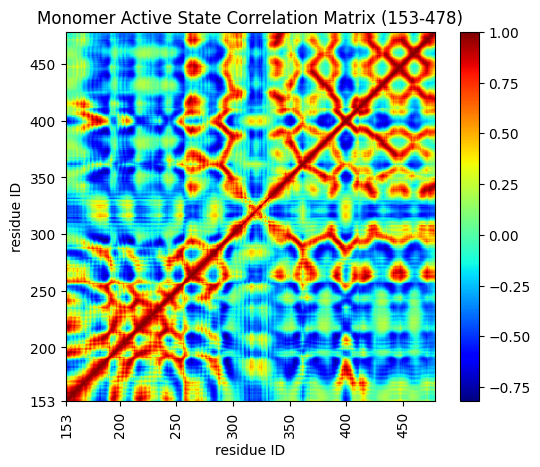

In [14]:
# Define the starting points and interval for ticks
initial_ticks = [153,200]
interval_ticks = 50
# Create the list of ticks starting from 155, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_active[-1], interval_ticks))
ticks_indices = [np.where(resnum_active == tick)[0][0] for tick in ticks if tick in resnum_active]
labels = [resnum_active[i] for i in ticks_indices]
# Plot for active state
plt.imshow(corr_activeMonomer, cmap='jet')
plt.title('Monomer Active State Correlation Matrix (153-478)')
plt.colorbar()

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.yticks(ticks=ticks_indices, labels=labels)
plt.xlabel('residue ID')
plt.ylabel('residue ID')
# Invert y-axis for the active state plot
plt.gca().invert_yaxis()
# Display the plots
plt.show()

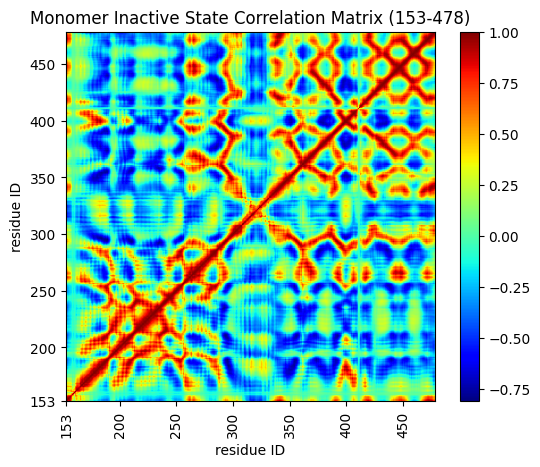

In [15]:
# Define the starting points and interval for ticks
initial_ticks = [153,200]
interval_ticks = 50
# Create the list of ticks starting from 155, then 200, then every 50 residues
ticks = initial_ticks + list(range(initial_ticks[-1] + interval_ticks, resnum_inactive[-1], interval_ticks))
ticks_indices = [np.where(resnum_inactive == tick)[0][0] for tick in ticks if tick in resnum_inactive]
labels = [resnum_inactive[i] for i in ticks_indices]
# Plot for active state
plt.imshow(corr_inactiveMonomer, cmap='jet')
plt.title('Monomer Inactive State Correlation Matrix (153-478)')
plt.colorbar()

# Set the x-axis ticks and labels
plt.xticks(ticks=ticks_indices, labels=labels, rotation=90)
plt.yticks(ticks=ticks_indices, labels=labels)
plt.xlabel('residue ID')
plt.ylabel('residue ID')
# Invert y-axis for the inactive state plot
plt.gca().invert_yaxis()
# Display the plots
plt.show()

# Visualization of the structures in VMD
First we will align the active and inactive structures before visualizing them together in VMD. Since the chains of these two structures match, we do not need to find the mathcing atoms in these chains. Let's first look at the RMSD between the resolved structures.

In [16]:
calcRMSD(inactiveDimer_ca, activeDimer_ca)

3.7457428731533535

Alignment of the active structure onto the inactive one can be easily done using the function superpose :

In [17]:
aligned_inactive_ca_dimer, T = superpose(inactiveDimer_ca, activeDimer_ca)

RMSD between these structures is minimized after this alignment as we will see below:

In [18]:
calcRMSD(aligned_inactive_ca_dimer, activeDimer_ca)

3.725895579771525

#### Monomer system

In [19]:
calcRMSD(inactiveMonomer_ca, activeMonomer_ca)

79.14540413167175

In [20]:
aligned_inactive_ca, T = superpose(inactiveMonomer_ca, activeMonomer_ca)

In [21]:
calcRMSD(aligned_inactive_ca, activeMonomer_ca)

3.127065130378235

# Deformation analysis and the comparison with ANM modes
We can easily calculate the deformation vector describing the change between two structures of the protein PRMT4, and then systematically compare it with ANM modes. Because the chains of these structures match and we have already aligned them, it is straightforward to calculate the deformation vector using calcDeformVector .

We then show the overlap or correlation cosine between the ANM modes and the deformation vector. The cumulative overlap is the square root of the sum of squared overlaps.

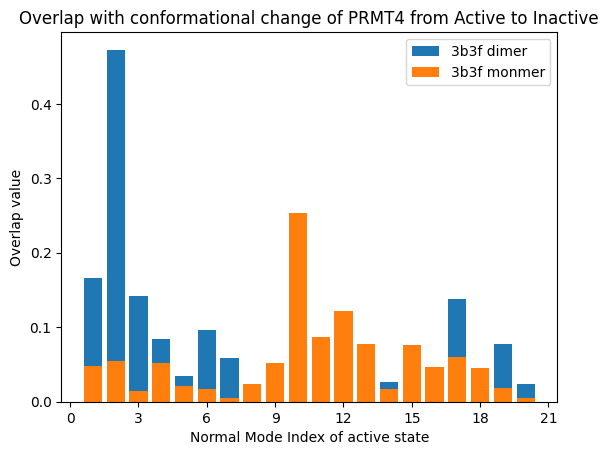

In [33]:
defvec_di = calcDeformVector(activeDimer_ca, inactiveDimer_ca)
defvec_mono = calcDeformVector(activeMonomer_ca, inactiveMonomer_ca)
showOverlaps(defvec_di.getNormed(), anm_activeDimer_ca, label= '3b3f dimer')
showOverlaps(defvec_mono.getNormed(), anm_activeMonomer_ca,label= '3b3f monmer')
plt.title("Overlap with conformational change of PRMT4 from Active to Inactive")
plt.xlabel("Normal Mode Index of active state")
plt.ylabel("Overlap value")
plt.legend()


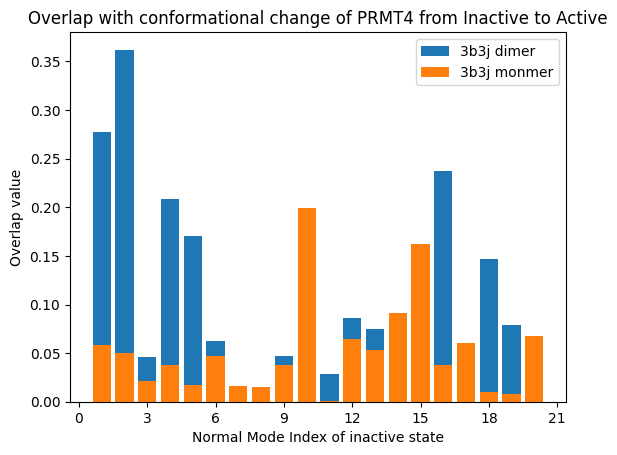

In [34]:
defvec_di2 = calcDeformVector(inactiveDimer_ca, activeDimer_ca)
defvec_mono2 = calcDeformVector(inactiveMonomer_ca, activeMonomer_ca)
showOverlaps(defvec_di2.getNormed(), anm_inactiveDimer_ca, label= '3b3j dimer')
showOverlaps(defvec_mono2.getNormed(), anm_inactiveMonomer_ca,label= '3b3j monmer')
plt.title("Overlap with conformational change of PRMT4 from Inactive to Active")
plt.xlabel("Normal Mode Index of inactive state")
plt.ylabel("Overlap value")
plt.legend()

In [35]:
(array(list(anm_activeDimer_ca[:9])) * defvec_di).astype(float64).round(2)

NameError: name 'array' is not defined

We observe that the first nonzero mode in the above figure, whose index is 0, overlaps best with the transition described by the deformation vector. Therefore, we can use this mode to generate a trajectory by the method traverseMode. This takes steps in both directions starting from the provided structure to generate conformers along the mode chosen.

Let's first generate a trajectory along this mode based on Cα atoms, and then calculate RMSD between the last conformer in the trajectory and the closed structure to see how close we can get to the latter. Remember RMSD between aligned structures is 7.13 ˚A.

In [ ]:
(array(list(anm[:6])) * defvecnormed).astype(float64).round(2)

In [34]:
traj_ca = traverseMode(anm_activeDimer_ca[0], activeDimer_ca, rmsd=2.0)
traj_ca.setAtoms(activeDimer_ca)

@> Parameter: rmsd = 2.00 A
@> Parameter: n_steps = 10
@> Step size is 0.20 A RMSD
@> Mode is scaled by 1.4988817576667797.


In [35]:
calcRMSD(aligned_inactive_ca_dimer, traj_ca[-1])

3.923329627557725

Let's generate a similar trajectory for all atom this time by using the previously generated all-atom ANM model, anm_open_aa. The next step is to use traverseMode again to generate conformers along the extended mode.

We can now visualize it in VMD.

In [ ]:
writeNMD('3b3f_dimer_anm_mode1', anm_activeDimer_ca,activeDimer)

# Visualization the ANM modes in VMD
ANM modes can be visualized with the VMD plugin NMWizard. This plugin can be found by navigating from VMD Main menu --> Analysis --> Normal Mode Wizard.

In order to visualize the ANM modes in NMWizard, we need to write them into a .nmd file using the method writeNMD.

However, before saving them in .nmd format, let's extend the ANM model based on Cα-atoms to all heavy atoms by the method extendModel.

In [28]:
anm_active_aa, atoms_all = extendModel(anm_activeDimer_ca, activeDimer_ca, activeDimer)
active_dimer_anm_mode1 = traverseMode(anm_active_aa[0], activeDimer)
active_dimer_anm_mode1.setAtoms(activeDimer)
writeNMD('3b3f_dimer_anm_mode1', anm_active_aa,activeDimer)

@> Parameter: rmsd = 1.50 A
@> Parameter: n_steps = 10
@> Step size is 0.15 A RMSD
@> Mode is scaled by 3.1814387229552152.


'3b3f_dimer_anm_mode1.nmd'

In [62]:
#inactive_dimer_anm_mode1 = traverseMode(anm_inactiveDimer_ca[0], inactiveDimer_ca)

#anm_inactive_aa, atoms_all = extendModel(anm_inactiveDimer_ca[0], inactiveDimer_ca, inactiveDimer, norm=True)

#inactive_dimer_anm_mode1.setAtoms(inactiveDimer)
#writeNMD('3b3j_dimer_anm', anm_active_aa,activeDimer)

@> Parameter: rmsd = 1.50 A
@> Parameter: n_steps = 10
@> Step size is 0.15 A RMSD
@> Mode is scaled by 0.8587249002385681.


ValueError: atoms must be same size or smaller than the ensemble

In [29]:
anm_active_mono_aa, atoms_all = extendModel(anm_activeMonomer_ca, activeMonomer_ca, activeMonomer)
active_monomer_anm_mode1 = traverseMode(anm_active_mono_aa[0], activeMonomer)
active_monomer_anm_mode1.setAtoms(activeMonomer)
writeNMD('3b3f_monomer_anm_mode1', anm_active_mono_aa,activeMonomer)

@> Parameter: rmsd = 1.50 A
@> Parameter: n_steps = 10
@> Step size is 0.15 A RMSD
@> Mode is scaled by 1.600283377945566.


'3b3f_monomer_anm_mode1.nmd'

In [30]:
anm_inactive_mono_aa, atoms_all = extendModel(anm_inactiveMonomer_ca, inactiveMonomer_ca, inactiveMonomer)
inactive_monomer_anm_mode1 = traverseMode(anm_inactive_mono_aa[0], inactiveMonomer)
inactive_monomer_anm_mode1.setAtoms(inactiveMonomer)
writeNMD('3b3j_monomer_anm_mode1', anm_inactive_mono_aa,inactiveMonomer)

@> Parameter: rmsd = 1.50 A
@> Parameter: n_steps = 10
@> Step size is 0.15 A RMSD
@> Mode is scaled by 1.7358785650324289.


'3b3j_monomer_anm_mode1.nmd'

In [34]:
writeNMD('3b3f_dimer_anm_mode1', anm_activeDimer_ca[0],activeDimer_ca)

'3b3f_dimer_anm_mode1.nmd'

In [44]:
writeNMD('3b3f_dimer_anm_mode2', anm_activeDimer_ca[1],activeDimer_ca)

'3b3f_dimer_anm_mode2.nmd'

In [35]:
writeNMD('3b3f_dimer_anm_mode4', anm_activeDimer_ca[3],activeDimer_ca)

'3b3f_dimer_anm_mode4.nmd'

In [36]:
writeNMD('3b3f_dimer_anm_mode10', anm_activeDimer_ca[9],activeDimer_ca)

'3b3f_dimer_anm_mode10.nmd'

In [37]:
writeNMD('3b3j_dimer_anm_mode2', anm_inactiveDimer_ca[1],inactiveDimer_ca)

'3b3j_dimer_anm_mode2.nmd'

In [38]:
writeNMD('3b3j_dimer_anm_mode3', anm_inactiveDimer_ca[2],inactiveDimer_ca)

'3b3j_dimer_anm_mode3.nmd'

In [39]:
writeNMD('3b3j_dimer_anm_mode10', anm_inactiveDimer_ca[9],inactiveDimer_ca)

'3b3j_dimer_anm_mode10.nmd'

In [40]:
writeNMD('3b3f_monomer_anm_mode3', anm_activeMonomer_ca[2],activeMonomer_ca)

'3b3f_monomer_anm_mode3.nmd'

In [41]:
writeNMD('3b3f_monomer_anm_mode4', anm_activeMonomer_ca[3],activeMonomer_ca)

'3b3f_monomer_anm_mode4.nmd'

In [42]:
writeNMD('3b3f_monomer_anm_mode13', anm_activeMonomer_ca[12],activeMonomer_ca)

'3b3f_monomer_anm_mode13.nmd'

In [31]:
writeNMD('3b3f_monomer_anm_mode15', anm_activeMonomer_ca[14],activeMonomer_ca)

'3b3f_monomer_anm_mode15.nmd'

In [45]:
writeNMD('3b3j_monomer_anm_mode3', anm_inactiveMonomer_ca[2],inactiveMonomer_ca)

'3b3j_monomer_anm_mode3.nmd'

In [46]:
writeNMD('3b3j_monomer_anm_mode4', anm_inactiveMonomer_ca[3],inactiveMonomer_ca)

'3b3j_monomer_anm_mode4.nmd'

In [47]:
writeNMD('3b3j_monomer_anm_mode6', anm_inactiveMonomer_ca[5],inactiveMonomer_ca)

'3b3j_monomer_anm_mode6.nmd'

In [48]:
writeNMD('3b3j_monomer_anm_mode9', anm_inactiveMonomer_ca[8],inactiveMonomer_ca)

'3b3j_monomer_anm_mode9.nmd'

In [32]:
writeNMD('3b3j_monomer_anm_mode20', anm_inactiveMonomer_ca[19],inactiveMonomer_ca)

'3b3j_monomer_anm_mode20.nmd'

In [36]:
writeNMD('3b3f_monomer_anm_mode19', anm_activeMonomer_ca[18],activeMonomer_ca)

'3b3f_monomer_anm_mode19.nmd'

In [37]:
writeNMD('3b3j_monomer_anm_mode12', anm_inactiveMonomer_ca[11],inactiveMonomer_ca)

'3b3j_monomer_anm_mode12.nmd'

In [38]:
writeNMD('3b3j_monomer_anm_mode15', anm_inactiveMonomer_ca[14],inactiveMonomer_ca)

'3b3j_monomer_anm_mode15.nmd'